<a href="https://colab.research.google.com/github/janjuatest/Public-Sector/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about the indentification of various social economic factors that can affect GDP per Capita after PPP of countries. The analysis is not exhaustive

Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Install  and import the World Bank data api


In [2]:
!pip install -U wbdata

In [3]:
import wbdata,datetime

Read the data from Figure 2.1 of World Happiness Report .
Data is avaiable at 
https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls
Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

In [ ]:
happDF=pd.read_excel('happiness.xls')

Renaming the columns so that they are more readable

DeathsTM is main target column which has the Total Covid-19 Deaths per 100,000 population

In [ ]:
happDF=happDF[['Country name','Ladder score']]

We will only take the main Ladder Score from the report.
Higher the ladder score the happier the country

In [ ]:
happDF

,Country name,Ladder score
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880
...,...,...
148,Central African Republic,3.4759
149,Rwanda,3.3123
150,Zimbabwe,3.2992
151,South Sudan,2.8166


In [ ]:
dfwho=pd.read_csv('WHO.csv')

In [ ]:
dfwho=dfwho[['Name','Deaths - cumulative total per 1 million population']]

In [ ]:
dfwho.columns=['Country','DeathsTM']

In [ ]:
dfwhoSorted=dfwho.sort_values('DeathsTM',ascending=False)

In [ ]:
dfwhoSorted.head(100)

,Country,DeathsTM
162,Gibraltar,2374.52
166,San Marino,2033.12
62,Slovenia,1872.11
26,Belgium,1842.34
5,The United Kingdom,1651.18
...,...,...
85,Kyrgyzstan,218.57
191,Guernsey,205.71
218,Montserrat,200.04
190,Bermuda,192.70


Sort the dataframe with highest number of deaths per capita

In [ ]:
happDF.columns=['Country','Score']

In [ ]:
for i in dfwho.index:
  deathsTM=dfwho.iloc[i]['DeathsTM']
  country=dfwho['Country'][i]
  happDF.loc[happDF['Country']==country,'deaths']=deathsTM
  if ((happDF['Country']==country).sum()==0):
    print(country)
  #print(dfwho['Country'][i],deathsTM)


Global
United States of America
Russian Federation
The United Kingdom
Iran (Islamic Republic of)
Czechia
Bolivia (Plurinational State of)
occupied Palestinian territory, including east Jerusalem
Republic of Moldova
Qatar
Oman
Venezuela (Bolivarian Republic of)
Puerto Rico
North Macedonia
Republic of Korea
Kosovo[1]
Cuba
Sudan
Côte d’Ivoire
Democratic Republic of the Congo
Angola
French Polynesia
French Guiana
Eswatini
Syrian Arab Republic
Cabo Verde
Belize
Mayotte
Réunion
Andorra
Guadeloupe
Suriname
Bahamas
Congo
Guyana
Guam
Aruba
Martinique
Djibouti
Equatorial Guinea
Somalia
Curaçao
Gibraltar
Jersey
San Marino
Guinea-Bissau
Liechtenstein
United States Virgin Islands
Eritrea
Viet Nam
Sint Maarten
Saint Lucia
Barbados
Turks and Caicos Islands
Monaco
Seychelles
Sao Tome and Principe
Saint Martin
Saint Vincent and the Grenadines
Papua New Guinea
Bhutan
Other
Bermuda
Guernsey
Faroe Islands
United Republic of Tanzania
Isle of Man
Cayman Islands
Saint Barthélemy
Bonaire
Antigua and Barbuda
B

In [ ]:
happDF[happDF.isnull().any(axis=1)]['Country']

Series([], Name: Country, dtype: object)

In [ ]:
for country in happDF[happDF.isnull().any(axis=1)]['Country']:
  print(country)
  deaths=input("Enter deaths for country")
  happDF.loc[happDF['Country']==country,'deaths']=deaths


United States
Enter deaths for country1376
Czech Republic
Enter deaths for country1609
Taiwan Province of China
Enter deaths for country0
Kosovo
Enter deaths for country811
South Korea
Enter deaths for country28.69
Bolivia
Enter deaths for country915
Moldova
Enter deaths for country875
Russia
Enter deaths for country525
North Cyprus
Enter deaths for country174
Hong Kong S.A.R. of China
Enter deaths for country0
Vietnam
Enter deaths for country.36
Ivory Coast
Enter deaths for country6.14
Congo (Brazzaville)
Enter deaths for country22
Macedonia
Enter deaths for country1399
Venezuela
Enter deaths for country43
Laos
Enter deaths for country0
Iran
Enter deaths for country695
Palestinian Territories
Enter deaths for country403
Congo (Kinshasa)
Enter deaths for country7.58
Swaziland
Enter deaths for country0
Tanzania
Enter deaths for country.35


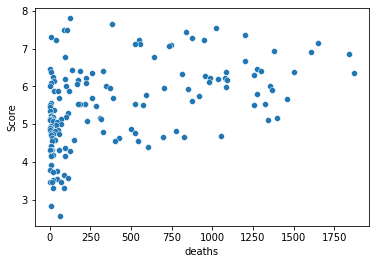

In [ ]:
sns.scatterplot(data=happDF,y='Score',x='deaths')

In [ ]:
happDF.corr()

,Score,deaths
Score,1.000000,0.453752
deaths,0.453752,1.000000


In [ ]:
happDF['deaths']=pd.to_numeric(happDF['deaths'])

In [ ]:
happDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  153 non-null    object 
 1   Score    153 non-null    float64
 2   deaths   153 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


Start from here after uploading and reading happDF

In [ ]:
wbdata.get_country("USA")

id    name
----  -------------
USA   United States

In [16]:
countries = [i['id'] for i in wbdata.get_country()] 

List of all countries/regions for which data is avalaible in World Bank data api

In [17]:
len(countries)

297

The code below collects the data from the World Bank data api

In [27]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"NE.EXP.GNFS.CD":"Exports","BX.KLT.DINV.CD.WD":"FDI","DT.DOD.PVLX.CD":"ForDebt"}#
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [21]:
easeDF.set_index('country',inplace=True)

In [28]:
easeDF=pd.concat([easeDF,df1],join='outer',axis=1)

In [29]:
easeDF.drop(columns=['Exports'])

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,Exports,FDI,ForDebt
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,4.821431e+09,1.201022e+09,4.980870e+09
United Arab Emirates,18.862478,16.0,70089.324038,1.438780,86.789,NaN,NaN,2.3710,77.470,100.000000,17.467406,56.0,2.23,6.7908,80.91489,3.893724e+11,3.893724e+11,1.378747e+10,NaN
Argentina,55.857033,126.0,23040.287953,0.993397,91.991,5.54549,0.813140,4.0013,76.221,100.000000,43.001857,425.0,9.22,5.9747,58.96151,7.768432e+10,7.768432e+10,6.663062e+09,2.146662e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.988621e+05,NaN
Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.977263e+12,5.977263e+12,4.041335e+11,2.252628e+12
British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.799684e+10,NaN
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_date = datetime.datetime(2016, 1,1), datetime.datetime(2016, 1, 1)
indicator1={"SE.ADT.LITR.FE.ZS":"FemaleLit"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"SP.POP.DPND":"PopDep","IC.BUS.EASE.XQ": "EaseofB","NY.GDP.PCAP.PP.CD":"GDPpppPC","SP.POP.GROW":"PopGrowth","SP.URB.TOTL.IN.ZS":"UrbanPop"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
data_date = datetime.datetime(2016, 1,1), datetime.datetime(2016, 1, 1)
indicator1={"SE.ADT.LITR.FE.ZS":"FemaleLit"}#,"MS.MIL.XPND.GD.ZS": "MilExpGdp","SH.MED.PHYS.ZS":"HosBedP1000","SP.DYN.LE00.IN":"LifeExp"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
data_date = datetime.datetime(2018, 1,1), datetime.datetime(2018, 1, 1)
indicator1={"EG.ELC.ACCS.ZS":"ElecAces","SL.TLF.TOTL.FE.ZS": "Fem%Lab","IP.PAT.RESD":"Patents","SL.UEM.TOTL.ZS":"UnemplR"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df3=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"IC.BUS.DFRN.XQ":"EofBScore"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
df1.reset_index(inplace=True)


In [ ]:
wbdf=pd.read_csv('wbdfN.csv')

In [ ]:
wbdf=pd.concat([wbdf,df1.drop(columns='country')],axis=1)

In [ ]:
wbdf.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore
0,Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497
2,Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838
3,Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847
4,Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473
259,"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299
260,South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897
261,Zambia,87.188180,85.0,3624.024939,2.892373,44.072,3.74792,1.429305,0.1628,62.464000,39.812622,48.295769,11.0,12.01,3.7594,66.93648


There are several null values in the data that may not be considered

In [ ]:
wbdf.reset_index(inplace=True)

In [ ]:
wbdf.drop('index',axis=1,inplace=True)

In [ ]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR
0,Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN
1,Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06
2,Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00
3,Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30
4,Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN
259,"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01
260,South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91
261,Zambia,87.188180,85.0,3624.024939,2.892373,44.072,3.74792,1.429305,0.1628,62.464000,39.812622,48.295769,11.0,12.01


The code below will copy the deaths per capita values for each country into the World Bank indicator dataframe



In [ ]:
for i in happDF.index:
  score=happDF.iloc[i]['Score']
  country=happDF['Country'][i]
  wbdf.loc[wbdf['country']==country,'HappScore']=score
  if ((wbdf['country']==country).sum()==0):
    print(country)
  #print(dfwho['Country'][i],deathsTM)

Taiwan Province of China
Slovenia
Slovakia
South Korea
Russia
Kyrgyzstan
North Cyprus
Hong Kong S.A.R. of China
Ivory Coast
Congo (Brazzaville)
Macedonia
Venezuela
Laos
Gambia
Iran
Palestinian Territories
Congo (Kinshasa)
Swaziland
Egypt
Yemen


The list above identifies countries with different names in the World Bank database and WHO database 

In [ ]:
wbdf[wbdf['country'].str.contains("Yemen")]


,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore
259,"Yemen, Rep.",72.787716,187.0,NaN,2.30058,37.273,NaN,NaN,NaN,66.087,62.0,7.895299,NaN,13.01,NaN


In [ ]:
wbdf.loc[wbdf['country'].str.contains("Yemen"),'HappScore']=3.52

In [ ]:
happDF[happDF['Country'].str.contains("Yemen")]

,Country,Score,deaths
145,Yemen,3.5274,20.65


The above three lines manually fills the deaths per capita for countries with different names in the two databases
Note: The above only shows one example. This was done for all countries in the list above

In [ ]:
wbdf[wbdf['HappScore'].notna() & wbdf['EaseofB'].isnull()]

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore
191,"Korea, Dem. People’s Rep.",41.345495,NaN,NaN,0.454320,62.134,NaN,NaN,3.7011,71.711,48.490826,47.095034,NaN,2.66,5.8740
232,Turkmenistan,54.680754,NaN,NaN,1.546389,52.048,NaN,NaN,NaN,67.835,100.000000,39.506066,NaN,3.79,5.1191


NameError: ignored

In [ ]:
df2.isnull().sum()

GexpEdu    122
dtype: int64

In [ ]:
wbdf=pd.read_csv('wbdfN.csv')

In [ ]:
wbdf.columns

Index(['Unnamed: 0', 'country', 'PopDep', 'EaseofB', 'GDPpppPC', 'PopGrowth',
       'UrbanPop', 'GexpEdu', 'MilExpGdp', 'HosBedP1000', 'LifeExp',
       'ElecAces', 'Fem%Lab', 'Patents', 'UnemplR', 'HappScore'],
      dtype='object')

In [ ]:
wbdf.drop(axis=1,columns='Unnamed: 0',inplace=True)

In [ ]:
wbdf.set_index('country',inplace=True)

In [ ]:
df1.set_index('country',inplace=True)

In [ ]:
wbdf=pd.concat([wbdf,df1],axis=1)

In [ ]:
wbdf.loc['Greece']

PopDep            55.855661
EaseofB           79.000000
GDPpppPC       32506.358965
PopGrowth         -0.154411
UrbanPop          79.388000
GexpEdu                 NaN
MilExpGdp          2.543063
HosBedP1000        5.403600
LifeExp           81.387805
ElecAces         100.000000
Fem%Lab           43.730367
Patents          430.000000
UnemplR           19.290001
HappScore          5.515000
EofBScore         68.423910
Name: Greece, dtype: float64

In [ ]:
happDF=wbdf[wbdf['HappScore'].notna()]# & wbdf['EaseofB'].isnull()]

In [4]:
easeDF=pd.read_csv('ease.csv')

In [5]:
easeDF

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore
0,Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497
1,Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838
2,Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847
3,United Arab Emirates,18.862478,16.0,70089.324038,1.438780,86.789,NaN,NaN,2.3710,77.470000,100.000000,17.467406,56.0,2.23,6.7908,80.91489
4,Argentina,55.857033,126.0,23040.287953,0.993397,91.991,5.54549,0.813140,4.0013,76.221000,100.000000,43.001857,425.0,9.22,5.9747,58.96151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473
184,"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299
185,South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897
186,Zambia,87.188180,85.0,3624.024939,2.892373,44.072,3.74792,1.429305,0.1628,62.464000,39.812622,48.295769,11.0,12.01,3.7594,66.93648


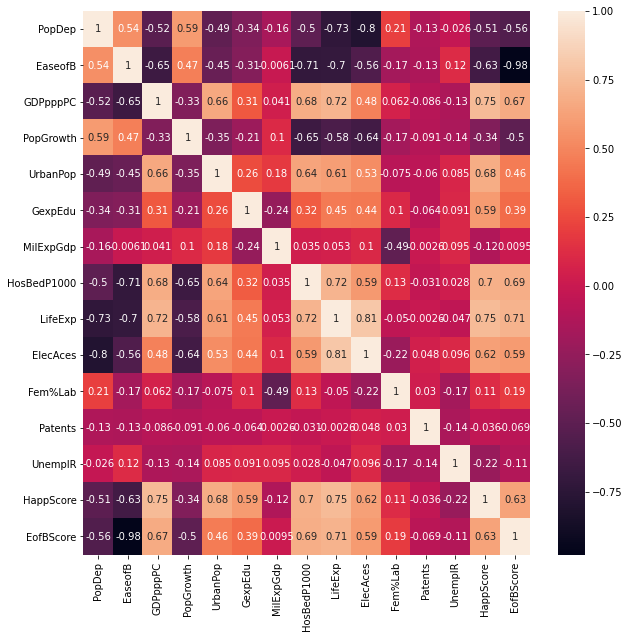

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(wbdf.corr(),annot=True)

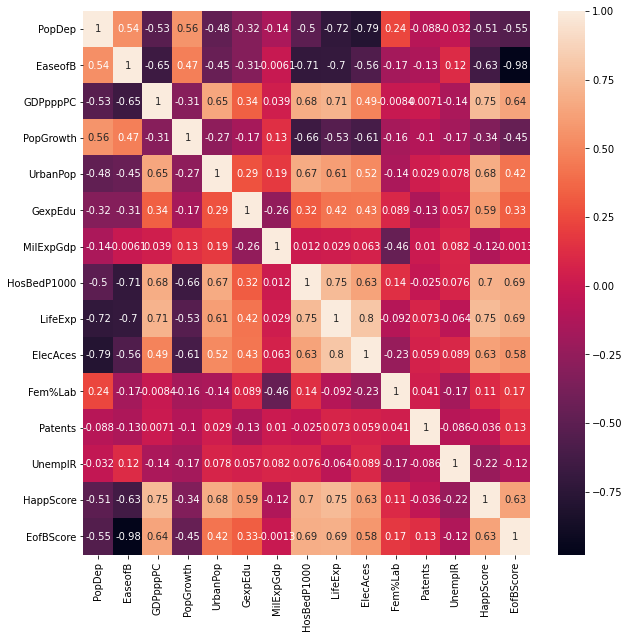

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(easeDF.corr(),annot=True)

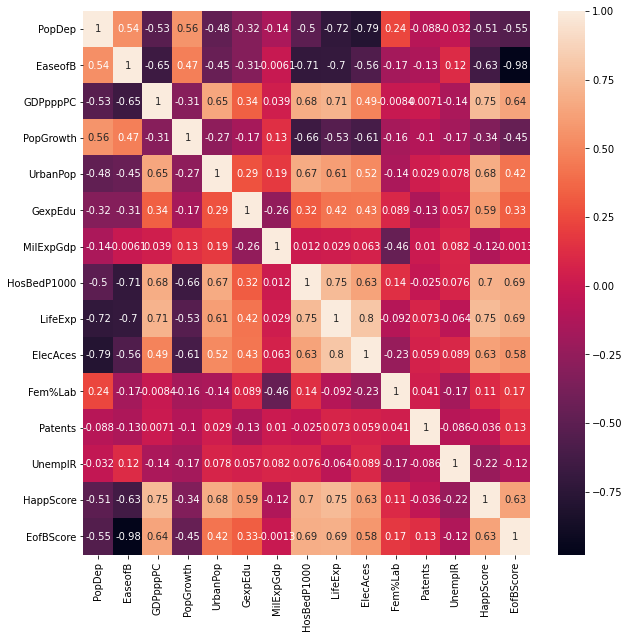

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(easeDF.corr(),annot=True)

In [ ]:
easeDF.isnull().sum()

PopDep          7
EaseofB         0
GDPpppPC        9
PopGrowth       1
UrbanPop        2
GexpEdu        84
MilExpGdp      39
HosBedP1000    78
LifeExp         5
ElecAces        0
Fem%Lab        11
Patents        74
UnemplR        11
HappScore      43
EofBScore       0
dtype: int64

In [10]:
easeDF.corrwith(easeDF['GDPpppPC'])

PopDep        -0.528428
EaseofB       -0.654750
GDPpppPC       1.000000
PopGrowth     -0.305781
UrbanPop       0.646582
GexpEdu        0.335308
MilExpGdp      0.038614
HosBedP1000    0.681918
LifeExp        0.711489
ElecAces       0.485304
Fem%Lab       -0.008379
Patents        0.007075
UnemplR       -0.136939
HappScore      0.750944
EofBScore      0.639667
dtype: float64

In [ ]:
#easeDF.fillna(easeDF.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


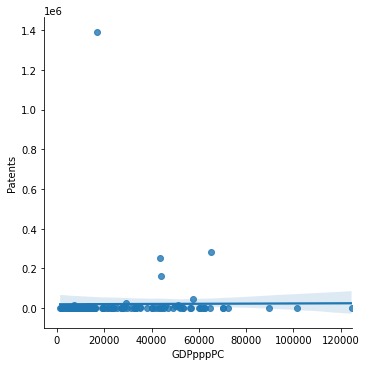

In [14]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='Patents')

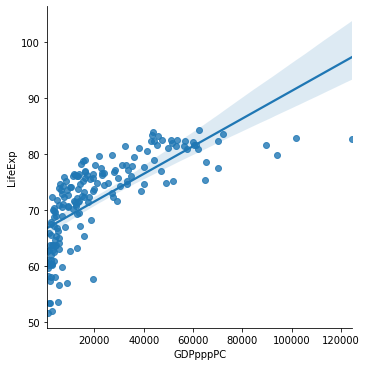

In [13]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='LifeExp')

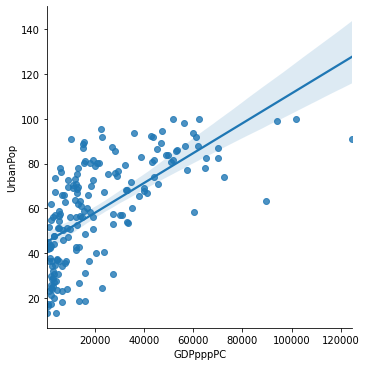

In [12]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='UrbanPop')

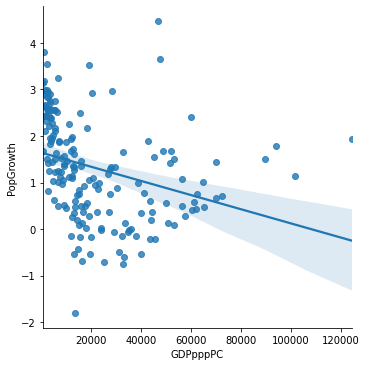

In [11]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='PopGrowth')

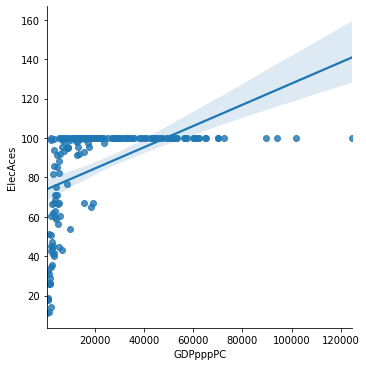

In [7]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='ElecAces')

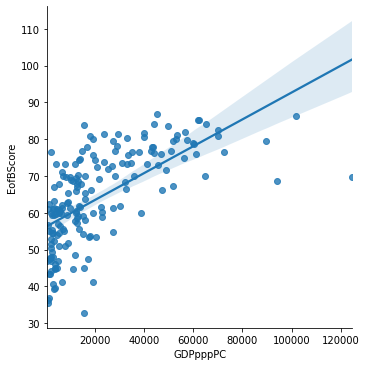

In [8]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='EofBScore')

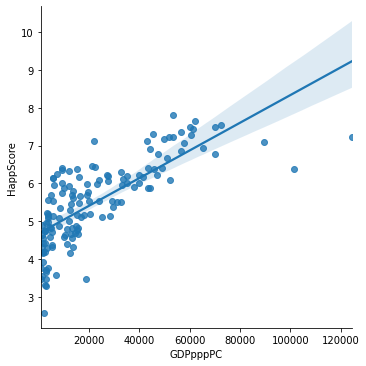

In [9]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='HappScore')

In [ ]:
from google.colab import files

In [ ]:
easeDF.to_csv('ease.csv')

In [ ]:
files.download('ease.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfWbWho.head()

,Unnamed: 0,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
0,0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868,571.34
1,1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763,61.91
2,2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925,14.45
3,3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194,502.47
4,4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN,1358.96


In [ ]:
dfWbWho.sort_values("EaseofB")[['country','EaseofB','deaths']].head(30)

,country,EaseofB,deaths
131,New Zealand,1.0,5.18
150,Singapore,2.0,4.96
49,Denmark,4.0,382.41
95,"Korea, Rep.",5.0,28.69
176,United States,6.0,1376.83
64,Georgia,7.0,822.98
63,United Kingdom,8.0,1651.18
129,Norway,9.0,107.36
160,Sweden,10.0,1199.59
104,Lithuania,11.0,1078.87


In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='kendall')

Unnamed: 0     -0.073088
PopDep         -0.229435
EaseofB        -0.315521
GDPpppPC        0.385542
DiabetesPrev    0.099927
PopGrowth      -0.369042
UrbanPop        0.323320
GexpEdu         0.148296
MilExpGdp      -0.022986
HosBedP1000     0.458290
LifeExp         0.408927
deaths          1.000000
dtype: float64

In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='pearson')

Unnamed: 0     -0.108665
PopDep         -0.302671
EaseofB        -0.436250
GDPpppPC        0.355147
DiabetesPrev   -0.020298
PopGrowth      -0.480993
UrbanPop        0.398103
GexpEdu         0.187636
MilExpGdp      -0.104677
HosBedP1000     0.519770
LifeExp         0.506314
deaths          1.000000
dtype: float64

In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='spearman')

Unnamed: 0     -0.107584
PopDep         -0.334360
EaseofB        -0.448218
GDPpppPC        0.540650
DiabetesPrev    0.158798
PopGrowth      -0.521502
UrbanPop        0.478636
GexpEdu         0.222906
MilExpGdp      -0.036911
HosBedP1000     0.635495
LifeExp         0.568403
deaths          1.000000
dtype: float64

The Correlations of Covid-19 deaths per 100,000 population with various indicators

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

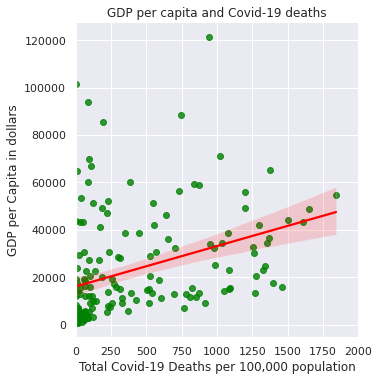

In [ ]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='GDPpppPC',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('GDP per Capita in dollars')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output2.png")
files.download("output2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

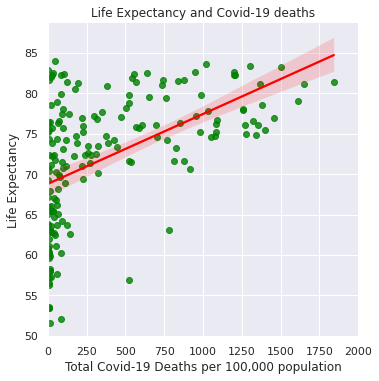

In [ ]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='LifeExp',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Life Expectancy and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Life Expectancy')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output1.png")
files.download("output1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

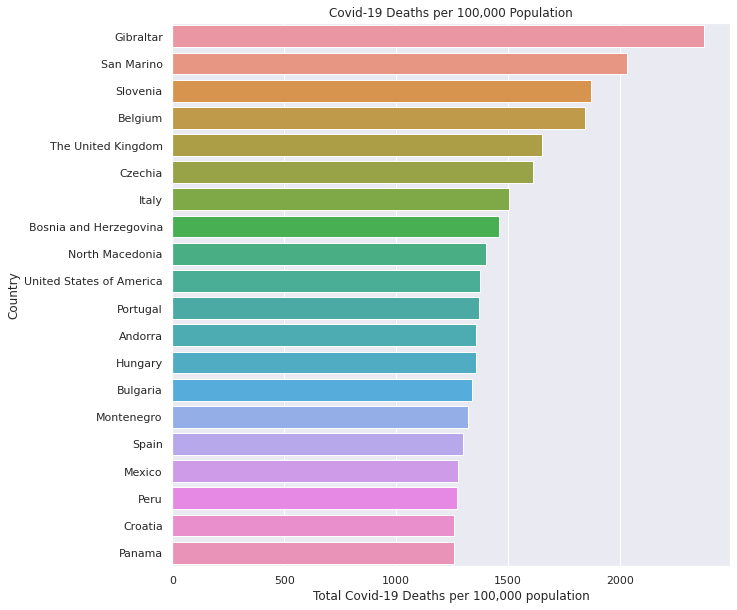

In [ ]:
sns.set(style = "darkgrid")
plt.tight_layout()
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plot=sns.barplot(data=dfwhoSorted.head(20),y='Country',x='DeathsTM')
plt.title('Covid-19 Deaths per 100,000 Population')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Country')
plot.figure.savefig("output3.png",bbox_inches='tight')
files.download("output3.png")



In [ ]:
len(dfWbWho)

187

In [ ]:
dfWbWho.isnull().sum()

Unnamed: 0       0
country          0
PopDep          13
EaseofB         14
GDPpppPC        19
DiabetesPrev     4
PopGrowth        1
UrbanPop         2
GexpEdu         84
MilExpGdp       39
HosBedP1000     79
LifeExp          8
deaths           0
dtype: int64

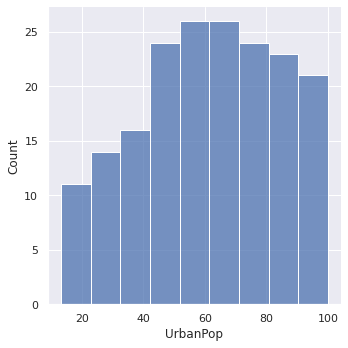

In [ ]:
sns.displot(x=dfWbWho['UrbanPop'])